# **Data Visualization Practice with Jupyter AI**

## About the Dataset

We will use the [hotel booking demand dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?resource=download) for the demo. It contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

A thorough analysis of this dataset helps us answer questions such as the best time of year to book a hotel room, or the optimal length of stay in order to get the best daily rate.

## About Jupyter AI
Jupyter AI brings generative AI to Jupyter. It provides a user-friendly and powerful way to explore generative AI models in notebooks and improve our productivity in JupyterLab and the Jupyter Notebook. According to its official documentation, it supports a wide range of model providers and models such as **OpenAI**, **Hugging Face Hub**, **A21**, **SageMaker**, etc. In order to use Jupyter AI with a particular provider, we have to install its Python packages and set its API key in our environment or in the chat interface:

<img src="interface.png" width="200">

## Prerequisites

* Install JupyterLab: `pip install jupyterlab~=4.0`
  
* Start JupyterLab: `!OPENAI_API_KEY=xxxxxxxxxx jupyter lab` (set OpenAI API key environment variable here so we can use Jupyter AI with `%%ai` and `%ai` commands later in the notebook cell)


## Dual Modes of Interacting with LLMs

### Jupyternaut

To engage in conversations with LLMs in a manner similar to OpenAI's ChatGPT, the user-friendly Jupyternaut chat assistant can be employed. The setup process is remarkably simple:

1. Access the chat interface: Begin by locating and clicking on the chat icon situated within the left-hand side panel of JupyterLab. This action initiates the chat interface, a gateway to effortless communication through Jupyternaut.
2. Start the configuration: Select the `Start Here` option, incorporate your unique OpenAI API Key, and tailor your interaction experience by selecting the preferred language model and embedding model that align with your communication goals. 
3. Save changes and engage with Jupyternaut:

<img src="jupyternaut.png" width="200">
<img src="example.png" width="200">

**Note:** One thing worth noting is that the language model is ready to be used for responding to our messages while the embedding model is used to transform input data, such as locally-saved text, images, or audio, into a numerical representation that can be processed by other models. This allows Jupyter AI to compose prompts using those representations and send prompts to language models, thus giving us customized answers based on our local documents.

In our case, I will use OpenAI's `gpt-3.5-turbo` as the language model and `text-embedding-ada-002` as the embedding model to power my data analysis and visualization process. 

### Magic Commands

Jupyter Notebook magic commands are special commands that provide additional functionality and control with Jupyter Notebook and JupyterLab environments. These commands start with a single `%` sign for line magics (affecting a single line) or `%%` for cell magics (affecting an entire code cell).

In order to employ Jupyter AI, we can also use magic commands - `%ai` and `%%ai` within the notebook cells.

If you already have `jupyter_ai` installed, the magics package `jupyter_ai_magics` is installed automatically. Otherwise, run `%pip run 
jupyter_ai_magics` to install the package.

Before sending our first prompt to an AI model, load the IPython extension by running: `%load_ext jupyter_ai_magics`.

Once the extension has loaded, you can run `%%ai` cell magic command and `%ai` line magic commands. The section below will walk through the basic commands that will help us navigate and manipulate the models.

First, let's install some dependencies! 


In [ ]:
# %pip install openai
# %pip install jupyter_ai

In [ ]:
%load_ext jupyter_ai_magics 

### List available models

In [ ]:
%ai list

In [ ]:
# or list openai-chat models
%ai list openai-chat

### Register and update model

Using the syntax `%ai register NAME TARGET` to create a new alias to an existing alias's target. The target should be specified using `provider-id:model-id` format. E.g.

In [ ]:
%ai register mychat openai:text-davinci-003

In [ ]:
# now let's list all available models again and you will see `mychat` is added to the name-target table
%ai list 

In [ ]:
# update target for self-defined name
%ai update mychat openai-chat:gpt-3.5-turbo

In [ ]:
%ai list

Now the target of `mychat` is updated to `openai-chat:gpt-3.5-turbo`.

In [ ]:
# delete self-defined name
%ai delete mychat

### Consume registered model

In [ ]:
%%ai chatgpt
Write python code to add two numbers

**Notice**: 
* If the command above gives a "Line magic function % not found" error, try to restart the kernel and rerun the code.
* Don't leave any comments in the cell above
* The first line specifies the model to use and the second line specifies the message you want to send to the LLM

### Format the output

By default, Jupyter AI assumes that a model will output markdown, but we can override this using `-f` or `--format` argument to our magic command. Valid formats include:

* `code`
* `image`(for Hugging Face Hub's text-to-image models only)
* `markdown`
* `math`
* `html`
* `json`
* `text`

For example, to force the model to output html format answers, we can run:

In [ ]:
%%ai chatgpt -f html
Write python code to add two numbers

### Interpolating in prompts

We can use curly brace syntax to include variables and other Python expressions in our prompts. This lets us execute a prompt using code that the IPython kernel knows about, but that is not in the current cell. E.g., 

In [ ]:
topic = "Hotel demand analysis"

In [ ]:
%%ai chatgpt -f text
I want to build a dashboard presenting {topic}. I want you to come up with a dashboard title for me so it's easy for other people to understand what kind of information I want to convey to my audience

In [ ]:
# error explanation
2/0

In [ ]:
%%ai chatgpt 
Explain error {Err[19]}

In [ ]:
# code explanation
print("Qin Yang")

In [ ]:
%%ai mychat
Explain code {In[22]}

### Clear chat history

In [ ]:
%%ai chatgpt -r
reset the chat history

Now we have a better understanding of how to use Jupyter AI with Jupyternaut and magic commands (`%%ai` and `%ai`), let's start analyzing the dataset and building some visualizations with the help Jupyter AI!

## Data Visualization Powered by Jupyter AI

In [178]:
# Load data
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Data Description:

* `hotel` : Hotel (Resort Hotel or City Hotel)
* `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
* `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* `arrival_date_year` : Year of arrival date
* `arrival_date_month` : Month of arrival date
* `arrival_date_week_number` : Week number of year for arrival date
* `arrival_date_day_of_month` : Day of arrival date
* `stays_in_weekend_nights` : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* `stays_in_week_nights` : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* `adults` : Number of adults
* `children` : Number of children
* `babies` : Number of babies
* `meal` : Type of meal booked. Categories are presented in standard hospitality meal packages:
    * Undefined/SC – no meal package
    * BB – Bed & Breakfast
    * HB – Half board (breakfast and one other meal – usually dinner)
    * FB – Full board (breakfast, lunch and dinner)
* `country` : Country of origin. Categories are represented in the ISO 3155–3:2013 format
* `market_segment` : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* `distribution_channel` : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
* `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
* `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
* `reserved_room_type` : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* `assigned_room_type` : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* `deposit_type` : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
    * No Deposit – no deposit was made
    * Non Refund * a deposit was made in the value of the total stay cost
    * Refundable – a deposit was made with a value under the total cost of stay.
* `agent` : ID of the travel agency that made the booking
* `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
* `customer_type` : Type of booking, assuming one of four categories:
    * Contract - when the booking has an allotment or other type of contract associated to it
    * Group – when the booking is associated to a group
    * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
    * Transient-party – when the booking is transient, but is associated to at least other transient booking
* `adr` : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* `required_car_parking_spaces` : Number of car parking spaces required by the customer
* `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
* `reservation_status` : Reservation last status, assuming one of three categories:
    * `Canceled` – booking was canceled by the customer
    * `Check-Out` – customer has checked in but already departed
    * `No-Show` – customer did not check-in and did inform the hotel of the reason why
* `reservation_status_date` : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [2]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Hotel Bookings by Date

In [179]:
df = df.rename(columns={"arrival_date_year":"year", "arrival_date_month":"month", "arrival_date_day_of_month":"day"})

# get arrival date
from datetime import datetime
month_strings = df["month"].unique().tolist()
month_mapping = {month: datetime.strptime(month, '%B').month for month in month_strings}
df["month"] = df["month"].map(month_mapping)
df["arrival_date"] = pd.to_datetime(df[["year", "month", "day"]])
df.head()

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [4]:
# import plotly.io as pio
# pio.renderers.default = 'notebook'

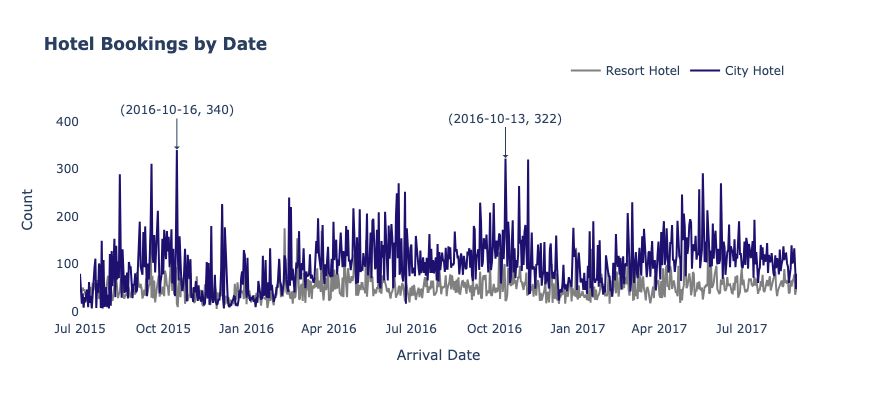

In [48]:
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

resort_trace = go.Scatter(
    x = df[df["hotel"]=="Resort Hotel"].groupby("arrival_date").count().reset_index().sort_values(by="arrival_date")["arrival_date"].tolist(),
    y = df[df["hotel"]=="Resort Hotel"].groupby("arrival_date").count().reset_index().sort_values(by="arrival_date")["hotel"].tolist(),
    name = "Resort Hotel",
    marker=dict(color="gray")
)

city_trace = go.Scatter(
    x = df[df["hotel"]=="City Hotel"].groupby("arrival_date").count().reset_index().sort_values(by="arrival_date")["arrival_date"].tolist(),
    y = df[df["hotel"]=="City Hotel"].groupby("arrival_date").count().reset_index().sort_values(by="arrival_date")["hotel"].tolist(),
    name = "City Hotel",
    marker=dict(color="#1D106E")
)

# Create annotations
annotations = [
    dict(
        x="2016-10-13",
        y=323,
        text="(2016-10-13, 322)",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40
    ),
    dict(
        x="2015-10-16",
        y=341,
        text="(2016-10-16, 340)",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40
    )
]

layout = go.Layout(
    title="<b>Hotel Bookings by Date</b>",
    width=900, 
    height=400,
    xaxis_title="Arrival Date",
    yaxis_title="Count",
    plot_bgcolor="rgba(0,0,0,0)",
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.2,
        xanchor="right",
        x=0.99
        ),
    annotations=annotations
)

fig = go.Figure(data=[resort_trace, city_trace], layout=layout)
fig.show()

### Customer Profile

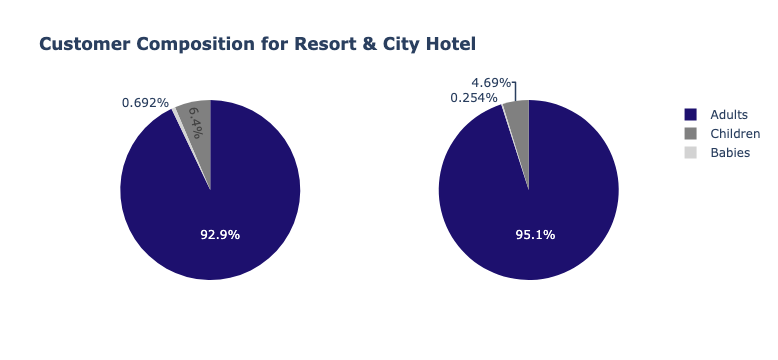

In [157]:
# Customer composition
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])
colors = ["#1D106E", "lightgray", "gray"]
fig.add_trace(
    go.Pie(
        labels=["Adults", "Babies", "Children"],
        values=df[df["hotel"]=="Resort Hotel"][["adults","babies", "children"]].sum().tolist(),
        name="Resort Hotel",
        marker=dict(colors=colors)
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Pie(
        labels=["Adults", "Babies", "Children"],
        values=df[df["hotel"]=="City Hotel"][["adults","babies", "children"]].sum().tolist(),
        name="City Hotel",
        marker=dict(colors=colors),
    ),
    row=1,
    col=2,
)

fig.update_layout(title='<b>Customer Composition for Resort & City Hotel</b>')
fig.show()

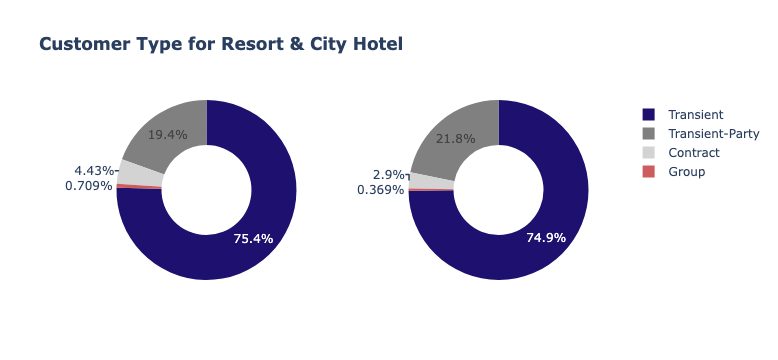

In [159]:
# Customer type
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])
colors = ["#1D106E", "gray", "lightgray", "indianred"]

fig.add_trace(
    go.Pie(
        labels=df[df["hotel"]=="Resort Hotel"]["customer_type"].value_counts().reset_index()["customer_type"],
        values=df[df["hotel"]=="Resort Hotel"]["customer_type"].value_counts().reset_index()["count"],
        name="Resort Hotel",
        marker=dict(colors=colors),
        hole=0.5
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Pie(
        labels=df[df["hotel"]=="City Hotel"]["customer_type"].value_counts().reset_index()["customer_type"],
        values=df[df["hotel"]=="City Hotel"]["customer_type"].value_counts().reset_index()["count"],
        name="City Hotel",
        marker=dict(colors=colors),
        hole=0.5
    ),
    row=1,
    col=2,
)

fig.update_layout(title='<b>Customer Type for Resort & City Hotel</b>')
fig.show()


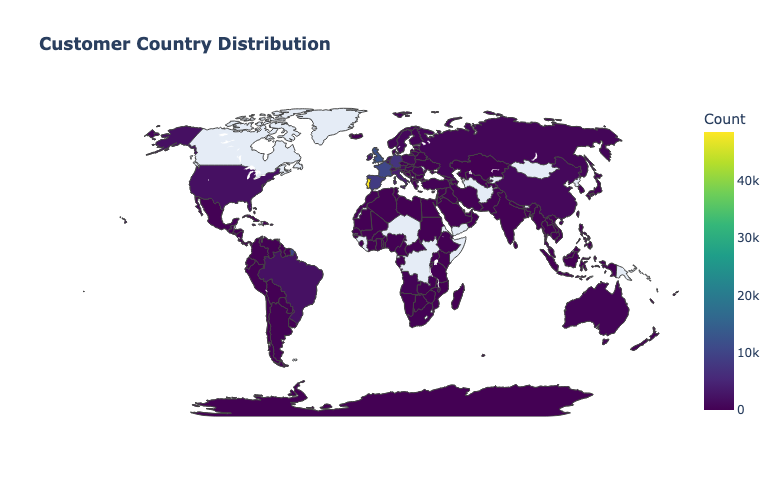

In [120]:
# Country distribution

# Get country names
import pycountry
country_code_mapping = {country.alpha_3: country.name for country in pycountry.countries}
country_names = []
for i in df["country"]:
    try:
        country_names.append(country_code_mapping[i])   
    except:
        country_names.append(None)
df["country_names"] = country_names

# Map plot
import plotly.graph_objects as go
country_trace = go.Choropleth(
    locations = df.groupby("country_names").count().reset_index()[["country_names", "hotel"]]["country_names"],  # List of location codes or names
    z = df.groupby("country_names").count().reset_index()[["country_names", "hotel"]]["hotel"],  # List of values to be mapped
    locationmode = 'country names',  # Specify the location mode
    colorscale = 'Viridis',  # Specify the color scale,
    colorbar_title="Count"
)

layout = go.Layout(
    title = '<b>Customer Country Distribution</b>',
    geo = dict(
        showframe = False,  # Hide the map frame
        projection = go.layout.geo.Projection(type = 'natural earth')  # Specify the map projection
    ),
    width=800,
    height=500
)

fig = go.Figure(data=[country_trace], layout=layout)
fig.show()

### Booking Channels

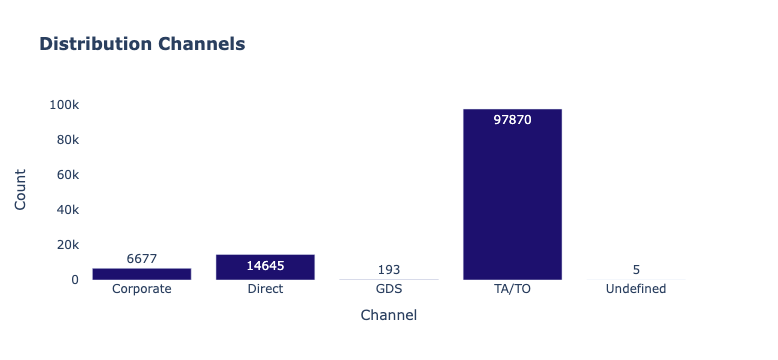

In [128]:
import plotly.graph_objects as go

booking_channel_trace = go.Bar(
    x=df.groupby("distribution_channel").count().reset_index()["distribution_channel"],
    y=df.groupby("distribution_channel").count().reset_index()["hotel"], 
    marker=dict(color="#1D106E"),
    text=df.groupby("distribution_channel").count().reset_index()["hotel"],
    textposition="auto"
)

layout = go.Layout(
    title='<b>Distribution Channels',
    xaxis=dict(title='Channel'),
    yaxis=dict(title='Count'),
    plot_bgcolor="rgba(0,0,0,0)",
)
fig = go.Figure(data=[booking_channel_trace], layout=layout)
fig.show()

### Stays in Weekends vs. Stays in Weekdays

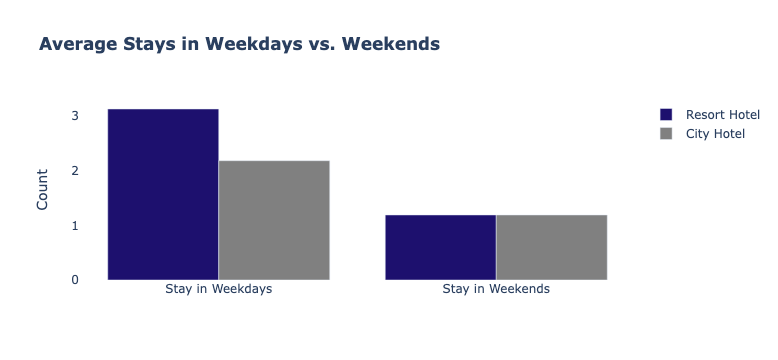

In [142]:
import plotly.graph_objects as go

stays_in_weekend_trace_resort = go.Bar(
    x=["Stay in Weekdays", "Stay in Weekends"],
    y=[df[df["hotel"]=="Resort Hotel"]["stays_in_week_nights"].mean(), df[df["hotel"]=="Resort Hotel"]["stays_in_weekend_nights"].mean()],
    marker=dict(color="#1D106E"),
    name="Resort Hotel"
)
stays_in_weekend_trace_city = go.Bar(
    x=["Stay in Weekdays", "Stay in Weekends"],
    y=[df[df["hotel"]=="City Hotel"]["stays_in_week_nights"].mean(), df[df["hotel"]=="Resort Hotel"]["stays_in_weekend_nights"].mean()],
    marker=dict(color="gray"),
    name="City Hotel"
)

layout = go.Layout(
    title='<b>Average Stays in Weekdays vs. Weekends',
    yaxis=dict(title='Count'),
    plot_bgcolor="rgba(0,0,0,0)",
)
fig = go.Figure(data=[stays_in_weekend_trace_resort, stays_in_weekend_trace_city], layout=layout)
fig.show()